<a href="https://colab.research.google.com/github/xandrade/python-bootcamp-for-geoengineers/blob/master/PioPetro/piopetro_session3_exploration_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install additional libraries: Lasio and Mplstereonet
!pip install lasio
!pip install mplstereonet

     |████████████████████████████████| 43 kB 1.1 MB/s 


In [2]:
# Get additional function for natural fracture analysis
!wget https://raw.githubusercontent.com/yohanesnuwara/formation-evaluation/main/fracture.py

--2022-05-15 06:08:09--  https://raw.githubusercontent.com/yohanesnuwara/formation-evaluation/main/fracture.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1840 (1.8K) [text/plain]
Saving to: ‘fracture.py’

fracture.py         100%[===================>]   1.80K  --.-KB/s    in 0s      

2022-05-15 06:08:09 (34.9 MB/s) - ‘fracture.py’ saved [1840/1840]



In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Import additional libraries
import lasio
import mplstereonet

# Import my in-house library for natural fracture analysis
import fracture

In [4]:
# Data links
well_path = "http://bit.ly/wireline-data"
trajectory_path = "http://bit.ly/trajectory-data"
fracture_path = "http://bit.ly/fractures-data"

## Well log data

In [18]:
# Read LAS well log data
well = lasio.read(well_path)

In [19]:
# Display mnemonics of well log
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [20]:
# The data is a multidimensional array
well.data

array([[4.93493134e+02,            nan, 1.94060001e+01, ...,
        1.54602885e+00,            nan, 1.54602885e+00],
       [4.93645538e+02,            nan, 1.94060001e+01, ...,
        1.57003009e+00,            nan, 1.57003009e+00],
       [4.93797943e+02,            nan, 1.94060001e+01, ...,
        1.59499407e+00,            nan, 1.59499407e+00],
       ...,
       [3.75226196e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75241431e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75256665e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00]])

In [21]:
# Convert well data to dataframe
well_df = well.df().reset_index()

well_df.head(10)

,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED
0,493.493134,NaN,19.406000,-0.708,NaN,1.789,64.497482,167.582153,50815100.0,1.574993,0.694700,1.546029,NaN,1.546029
1,493.645538,NaN,19.406000,-0.722,NaN,1.754,62.406261,167.425064,50761636.0,1.569011,0.445339,1.570030,NaN,1.570030
2,493.797943,NaN,19.406000,-0.620,NaN,1.778,62.629055,167.808395,50886056.0,1.578010,0.727901,1.594994,NaN,1.594994
3,493.950348,NaN,19.452999,-0.648,NaN,1.642,65.998596,169.244873,51314492.0,1.586024,1.474898,1.589930,NaN,1.589930
4,494.102722,NaN,19.452999,-0.685,NaN,1.563,64.997223,170.635086,51763464.0,1.603011,-0.023000,1.540016,NaN,1.540016
5,494.255127,NaN,19.469000,-0.780,NaN,1.460,62.685898,170.872452,51832144.0,1.611995,-0.024201,1.553041,NaN,1.553041
6,494.407532,NaN,19.469000,-0.753,NaN,1.521,60.940327,168.705414,51156364.0,1.608000,-1.023601,1.587050,NaN,1.587050
7,494.559937,NaN,19.469000,-0.696,NaN,1.555,62.876503,166.633835,50533572.0,1.608009,-1.522700,1.628994,NaN,1.628994
8,494.712341,NaN,19.469000,-0.689,NaN,1.546,64.122894,164.598587,49901012.0,1.615006,-1.273039,1.623959,NaN,1.623959
9,494.864746,NaN,19.469000,-0.693,NaN,1.519,62.369705,164.445160,49858040.0,1.620018,-1.303498,1.589999,NaN,1.589999


In [22]:
# Basic of for looping
list_name = ["James", "Peter", "John", "Andrew", "Matthew"]

# Option #1
for i in list_name:
  print(i)

# Option #2
for i in range(len(list_name)):
  print(list_name[i]) 

James
Peter
John
Andrew
Matthew
James
Peter
John
Andrew
Matthew


In [23]:
# If conditional + for looping
list_name = ["James", "Peter", "John", "Andrew", "Matthew"]

for i in range(len(list_name)):
  if list_name[i]=="John":
    print("His name is John")
  else:
    print("His name is NOT John")

His name is NOT John
His name is NOT John
His name is John
His name is NOT John
His name is NOT John


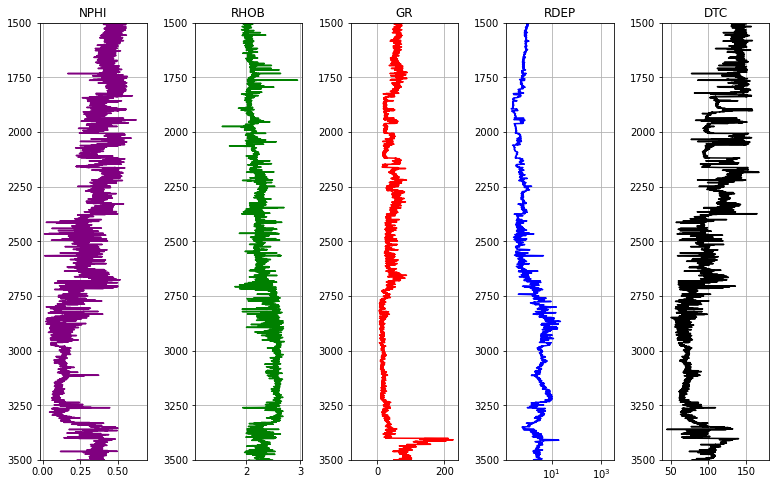

In [31]:
# Visualize well logs using for loop and subplots: NPHI, RHOB, GR, RDEP, DTC
columns = ["NPHI", "RHOB", "GR", "RDEP", "DTC"]
colors = ["purple", "green", "red", "blue", "black"]

plt.figure(figsize=(11,7))
for ix, data in enumerate(zip(columns, colors), start=1):
  column, color = data
  plt.subplot(1, 5, ix)
  # Give exception for RDEP for semilog plot
  if column == "RDEP":
    plt.semilogx(well_df[column], well_df["DEPT"], color=color)
  else:
    # Others are normal plot
    plt.plot(well_df[column], well_df["DEPT"], color=color)
  
  plt.ylim(3500,1500)
  plt.title(column)
  plt.grid()

plt.tight_layout(1.5)
plt.show()

## Wellbore trajectory

In [12]:
# Load wellbore trajectory CSV data\
traj_df = pd.read_csv(trajectory_path)

traj_df.head(10)

,azi,md,tvd,incl,dispNs,dispEw,TVD_calc,surfNs,surfEw
0,0.00,0.0,0.0000,0.00,-3.1700,3.5300,0.000000,6.478560e+06,435053.550000
1,0.00,145.9,145.9000,0.00,-3.1700,3.5300,145.900000,6.478560e+06,435053.550000
2,253.69,153.4,153.4000,0.15,-3.1728,3.5206,153.399991,6.478560e+06,435053.540578
3,146.02,234.2,234.1996,0.28,-3.3662,3.5294,234.199630,6.478560e+06,435053.549412
4,136.21,274.6,274.5978,0.78,-3.6465,3.7749,274.597780,6.478560e+06,435053.794881
5,128.29,315.0,314.9898,1.46,-4.1640,4.3691,314.989847,6.478559e+06,435054.389145
6,124.07,355.3,355.2515,3.41,-5.1536,5.7651,355.251543,6.478558e+06,435055.785053
7,126.98,395.7,395.5379,5.13,-6.9133,8.2034,395.537936,6.478557e+06,435058.223387
8,139.07,436.1,435.7648,5.52,-9.4680,10.9194,435.764783,6.478554e+06,435060.939355
9,152.33,474.4,473.8855,5.62,-12.5207,12.9971,473.885535,6.478551e+06,435063.017149


In [13]:
# Plot trajectory with inclination as point colors
fig = px.scatter_3d(data_frame=traj_df, x="surfEw", y="surfNs", z="TVD_calc",
                    color="incl")
fig.update_scenes(zaxis_autorange="reversed")

fig.show()

## Natural fracture analysis

In [14]:
# Load fracture CSV data
frac_df = pd.read_csv(fracture_path)

frac_df.head(10)

,depth,strike,dip,dip_direction,aperture
0,5200.824,228.25,76.41,318.25,4.31
1,5200.965,207.80,86.11,297.80,5.87
2,5205.068,233.97,84.07,323.97,7.22
3,5208.820,206.68,82.67,296.68,5.52
4,5221.970,214.65,77.20,304.65,5.44
5,5232.421,211.99,79.37,301.99,9.95
6,5248.538,214.61,79.88,304.61,12.24
7,5252.678,226.41,84.78,316.41,10.21
8,5269.203,245.50,80.63,335.50,8.22
9,5280.625,238.08,81.70,328.08,2.67


In [15]:
# Define strike and dip
strikes = frac_df.strike.values
dips = frac_df.dip.values

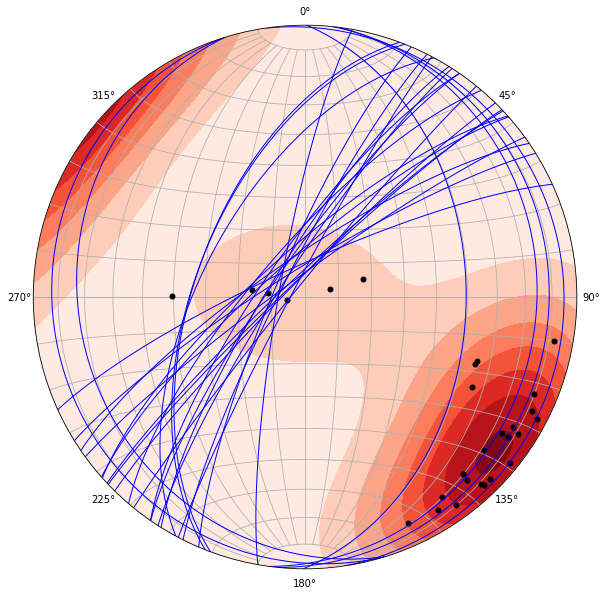

In [16]:
# Visualize stereonets (Schmidt projection) from "fracture" library
fracture.stereonet(strikes, dips)

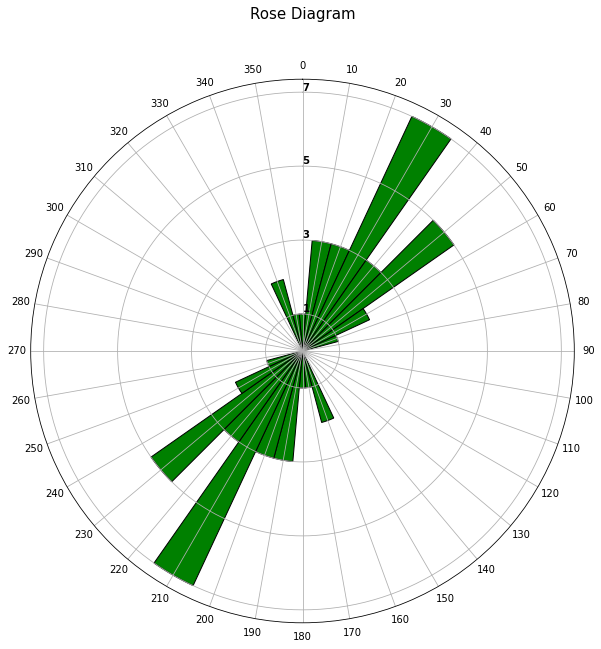

In [17]:
# Visualize Rose diagram from "fracture" library 
fracture.rose(strikes)